### Reading Wiki Dataset

In [1]:
import json
import logging
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/DL_Project/GPT-intro-processed.csv'
df = pd.read_csv(file_path)
df.head(5)

,id,wiki_intro,generated_intro
0,63064638,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...
1,279621,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an..."
2,287229,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc..."
3,26712375,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...
4,38894426,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ..."


In [4]:
alt_df=df.copy()

#### Use exisiting RADAR Huggingface model to generate prediction for 100 data points from Wiki dataset through API calls to see how exisiting RADAR performs
https://trustsafeai-radar-ai-text-detector.hf.space/

In [5]:
!pip install gradio_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [6]:
!pip install trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00


In [7]:
from gradio_client import Client

In [8]:
client = Client("https://trustsafeai-radar-ai-text-detector.hf.space/")

Loaded as API: https://trustsafeai-radar-ai-text-detector.hf.space/ ✔


In [ ]:
sample_df=alt_df.head(100)

In [9]:
def get_prediction(text):
	result = client.predict(
				text,	# str  in 'Text to be detected' Textbox component
				api_name="/predict")
	with open(result, 'r') as json_file:
		json_data = json.load(json_file)
	confidences = json_data['confidences']
	max_confidence_label = max(confidences, key=lambda x: x['confidence'])['label']
	return (1 if max_confidence_label == "AI-generated" else 0)

In [ ]:
sample_df['prediction'] = sample_df['generated_intro'].apply(get_prediction)

<ipython-input-34-eaa36f5cd660>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['prediction'] = sample_df['generated_intro'].apply(get_prediction)


In [ ]:
sample_df

,id,wiki_intro,generated_intro,prediction
0,63064638,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,0
1,279621,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1
2,287229,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",1
3,26712375,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,1
4,38894426,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",0
...,...,...,...,...
95,11634763,The plain-mantled tit-spinetail (Leptasthenura...,The plain-mantled tit-spinetail (Leptasthenura...,1
96,34509105,"Dnestr radar and Dnepr radar , both known by ...","Dnestr radar and Dnepr radar , or simply rada...",1
97,61540602,The Northwestern Mari (self definition: йөтнӫм...,The Northwestern Mari (self definition: йөтнӫм...,0
98,4864858,Major General Sir Thomas William Glasgow (6 J...,Major General Sir Thomas William Glasgow \n\nT...,0


In [ ]:
np.mean(([len(x) for x in sample_df['wiki_intro']]))

1228.5

In [ ]:
value_counts = sample_df['prediction'].value_counts(normalize=True)
percentage_0 = value_counts[0] * 100
percentage_1 = value_counts[1] * 100

print(f'Percentage of 0s: {percentage_0:.2f}%')
print(f'Percentage of 1s: {percentage_1:.2f}%')

Percentage of 0s: 46.00%
Percentage of 1s: 54.00%


#### Get human text H corpus, AI-generated M corpus and Validation data

In [10]:
# Get 10% of data as validation set
sample_size = int(0.10 * len(alt_df))
validate_df = alt_df.sample(n=sample_size, random_state=42)
alt_df = alt_df.drop(validate_df.index)
validate_df.head(10)

,id,wiki_intro,generated_intro
59770,28309756,The Benetton B187 is a Formula One racing car ...,The Benetton B187 is a Formula One racing car ...
21362,2387525,The Heliodisplay is an air-based display using...,The Heliodisplay is an air-based display using...
127324,15214263,"Mitochondrial carrier homolog 1 (MTCH1), also ...","Mitochondrial carrier homolog 1 (MTCH1), also ..."
140509,636846,"Calluna vulgaris, common heather, ling, or sim...","Calluna vulgaris, common heather, ling, or sim..."
144297,36667499,Berea–Midpark High School (BMHS) is a public h...,Berea–Midpark High School (BMHS) is a public h...
96370,8776164,Sparta Amfi is an indoor ice hockey rink locat...,Sparta Amfi is an indoor ice hockey rink locat...
49742,64656506,Jagdish Mahto was a naxal leader who led the B...,Jagdish Mahto was a naxal leader who was activ...
47389,31806743,"Barbara Fish Lee (born July 3, 1945) is an Ame...","Barbara Fish Lee (born July 3, 1945) is an Ame..."
58378,1856662,Volodymyr Antonovych (Ukrainian: Володимир Бон...,Volodymyr Antonovych (Ukrainian: Володимир Бон...
69047,32939850,Tiit is predominantly an Estonian masculine gi...,Tiit is predominantly an Estonian masculine gi...


In [11]:
validate_df = validate_df.sample(frac=1).reset_index(drop=True)

# Select the first 10 rows from 'wiki_intro' and 'generated_intro'
validation_data = validate_df.loc[:9, ['wiki_intro', 'generated_intro']]

# Convert the selected rows to a list of tuples
validation_data = [tuple(x) for x in validation_data.values]

In [ ]:
validation_data

[('R. Bruce Land (born June 24, 1950) is an American Democratic Party politician who represented the 1st Legislative District in the New Jersey General Assembly from 2016 to 2020. Early life \nLand grew up in Millville, New Jersey and graduated from Millville Senior High School as part of the class of 1968. He was drafted to serve in the United States Army and was assigned to duty with the 101st Airborne Division in Vietnam during the second year of his two-year enlistment from 1969 to 1971, and was twice awarded the Bronze Star during the Vietnam War. Land attended Cumberland County College, where he majored in business marketing. Land had worked in management of a department store in Vineland. He made a career change and began working for the New Jersey Department of Corrections, assigned to Bayside State Prison in Leesburg and South Woods State Prison in Bridgeton until his retirement in March 2008 with the rank of captain.',
  "R. Bruce Land (born June 24, 1950) is an American astr

In [15]:
valid_data=validate_df.head(50)

In [16]:
valid_data

,id,wiki_intro,generated_intro
0,51685363,"Trumaine Barnett-Epps (born September 19, 1987...","Trumaine Barnett-Epps (born September 19, 1987..."
1,30865437,A ranch (from /Mexican Spanish) is an area of ...,A ranch (from /Mexican Spanish) is an agricult...
2,349339,The Georgian era is a period in British histor...,The Georgian era is a period in the history of...
3,8756437,Dinah! is a daytime variety talk show that was...,Dinah! is a daytime variety talk show that air...
4,246538,"Joseph-Napoléon-Henri Bourassa (; September 1,...","Joseph-Napoléon-Henri Bourassa (; September 1,..."
5,28854052,"Robert S. Smith (February 7, 1932 – July 27, 2...","Robert S. Smith (February 7, 1932 – November 1..."
6,6975619,"""Starless"" is a composition by English progres...","""Starless"" is a composition by English progres..."
7,5426027,Jingletown is a pocket arts community in Oakla...,Jingletown is a pocket arts community in Los A...
8,56302988,"Shan Xiongxin (? - 620) was a general, top war...",Shan Xiongxin (? - 620) was a Chinese Buddhist...
9,56136529,Mahatma was a monthly magic periodical founded...,Mahatma was a monthly magic periodical founded...


In [14]:
wiki_intro_predictions = valid_data['wiki_intro'].apply(lambda text: get_prediction(text)).tolist()

# Apply the get_prediction function to all "generated_intro" texts
generated_intro_predictions = valid_data['generated_intro'].apply(lambda text: get_prediction(text)).tolist()

# Print or use the predictions lists as needed
print("Wiki Intro Predictions:", wiki_intro_predictions)
print("Generated Intro Predictions:", generated_intro_predictions)

KeyboardInterrupt: ignored

In [ ]:
file_path = "wiki_intro_predictions.txt"

# Open the file in write mode and write each element of the list to the file
with open(file_path, 'w') as file:
    for prediction in wiki_intro_predictions:
        file.write(f"{prediction}\n")

with open(file_path, 'w') as file:
    for prediction in generated_intro_predictions:
        file.write(f"{prediction}\n")

In [ ]:
valid_data['prediction_ai'] = valid_data['generated_intro'].apply(get_prediction)

In [ ]:
valid_data['prediction_h'] = valid_data['wiki_intro'].apply(get_prediction)

In [ ]:
valid_data

## Baseline Implementation - RADAR on Wiki dataset

In [ ]:
!pip install transformers

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForSequenceClassification, AdamW
import torch
import torch.optim as optim
import random
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

#### Step 1: Paraphraser - pretrained T5-large
https://huggingface.co/ramsrigouthamg/t5-large-paraphraser-diverse-high-quality

In [ ]:
paraphraser_model = AutoModelForSeq2SeqLM.from_pretrained("ramsrigouthamg/t5-large-paraphraser-diverse-high-quality")
paraphraser_tokenizer = AutoTokenizer.from_pretrained("ramsrigouthamg/t5-large-paraphraser-diverse-high-quality")
paraphraser_model.to(device)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

In [ ]:
def get_paraphrase(text, paraphraser_model, paraphraser_tokenizer, device):
    text = "Enhance word choices to make the sentence sound more like a human: " + text + " </s"

    encoding = paraphraser_tokenizer.encode_plus(text, max_length=1024, truncation=False, return_tensors="pt")
    input_ids, attention_mask = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

    paraphraser_model.eval()
    beam_outputs = paraphraser_model.generate(
        input_ids=input_ids, attention_mask=attention_mask,
        max_length=10000,
        early_stopping=False,
        num_beams=15,
        num_return_sequences=1
    )

    sent = paraphraser_tokenizer.decode(beam_outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return sent[len("paraphrasedoutput: "):]

In [ ]:
#paraphrase = get_paraphrase("Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. The station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business.")

#### Step 2: RoBERTa Detector (OpenAI)
https://huggingface.co/roberta-large-openai-detector

In [ ]:
detector_model = AutoModelForSequenceClassification.from_pretrained("roberta-large-openai-detector")
detector_tokenizer = AutoTokenizer.from_pretrained("roberta-large-openai-detector")
detector_model.to(device)

Some weights of the model checkpoint at roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [ ]:
def classify_text(text):
    # Tokenize the text
    inputs = detector_tokenizer(text, return_tensors="pt")

    # Pass the text through the model
    with torch.no_grad():
        output = detector_model(**inputs)

    # Get the predicted label (1 if AI-generated and 0 if not)
    label = 1 if output.logits[0][0] > output.logits[0][1] else 0

    return label

In [ ]:
# text = "Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England. The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870. It was closed to passengers on 5 January 1950, and to goods on 12 May 1965. The station building is now a private residence. There is a small amount of trackage remaining near the building, used currently by a local agricultural business."
# label = classify_text(text)
# print(label)

### Step 3: Training with reward - not completed

In [ ]:
# Initialize hyperparameters
max_steps = 10  # Maximum training steps 100
batch_size = 2 #32
learning_rate = 1e-5
epsilon = 0.2
gamma = 1.0
lambda_val = 0.1

# Initialize replay buffer
replay_buffer = []

human_text_corpus = list(alt_df['wiki_intro'])
AI_text_corpus = list(alt_df['generated_intro'])

# Initialize the optimizer for the paraphraser model
paraphraser_optimizer = optim.AdamW(paraphraser_model.parameters(), lr=learning_rate)

# Initialize the old action probabilities
old_action_prob = None

In [ ]:

# Training loop
for step in range(max_steps):
    torch.cuda.empty_cache()
    # Sample x_h and x_m from H and M, respectively
    x_h = human_text_corpus[np.random.randint(len(human_text_corpus))]
    x_m = AI_text_corpus[np.random.randint(len(AI_text_corpus))]

    # Calculate the reward using the detector model
    x_p_text = get_paraphrase(x_m, paraphraser_model, paraphraser_tokenizer, device)
    inputs = detector_tokenizer(x_p_text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = detector_model(**inputs)
    reward = torch.sigmoid(outputs.logits)

    # Normalize the reward
    normalized_reward = (reward - reward.min()) / (reward.max() - reward.min())

    # Add data to the replay buffer
    replay_buffer.append((x_h, x_m, x_p_text, normalized_reward))
    # counterrrr = 0
    # print("Running")
    if len(replay_buffer) >= batch_size:
        # print("Run ",counterrrr)

        # Train the paraphraser model
        torch.autograd.set_detect_anomaly(True)
        paraphraser_model.train()
        paraphraser_optimizer.zero_grad()

        data = random.sample(replay_buffer, batch_size)
        x_p_texts = [item[2] for item in data]
        x_m_texts = [item[1] for item in data]

        inputs = paraphraser_tokenizer(x_m_texts, x_p_texts, return_tensors="pt", padding=True, truncation=True).to(device)
        action_prob = outputs['logits']*1
        # Calculate the ratio between new and old action probabilities
        ratio = action_prob / old_action_prob if old_action_prob is not None else 1.0
        # Calculate the surrogate loss
        loss_surrogate = -(ratio * normalized_reward)
        # Compute the PPO loss
        loss_ppo = torch.mean(loss_surrogate)

        # Backpropagate and update the paraphraser model using PPO loss
        # loss_ppo.backward()
        paraphraser_optimizer.step()

        torch.autograd.set_detect_anomaly(False)
        # Update old action probabilities
        old_action_prob = action_prob

        # Train the detector model
        detector_model.train()
        optimizer = optim.AdamW(detector_model.parameters(), lr=learning_rate)
        x_h_texts = [item[0] for item in data]
        x_p_texts = [item[2] for item in data]
        labels_h = torch.zeros(len(data), dtype=torch.long).to(device)
        labels_m = torch.ones(len(data), dtype=torch.long).to(device)

        inputs_h = detector_tokenizer(x_h_texts, return_tensors="pt", padding=True, truncation=True)
        inputs_m = detector_tokenizer(x_p_texts, return_tensors="pt", padding=True, truncation=True)
        labels = torch.cat((labels_h, labels_m))

        outputs = detector_model(input_ids = inputs_h['input_ids'].cuda(),attention_mask = inputs_h['attention_mask'].cuda(),labels = labels_h )
        loss_h = outputs.loss
        outputs = detector_model(input_ids = inputs_m['input_ids'].cuda(),attention_mask = inputs_m['attention_mask'].cuda(),labels = labels_m )

        loss_m = outputs.loss
        # print("Loss at iteration : ",step,loss_h.item())
        loss = loss_h + lambda_val * loss_m
        print("Loss at iteration ",step," : ",loss.item())
        loss.backward()
        optimizer.step()

        replay_buffer = []


Loss at iteration  1  :  3.030247926712036
Loss at iteration  3  :  4.03068733215332
Loss at iteration  5  :  1.9607526063919067
Loss at iteration  7  :  0.5832623839378357
Loss at iteration  9  :  0.4764351546764374


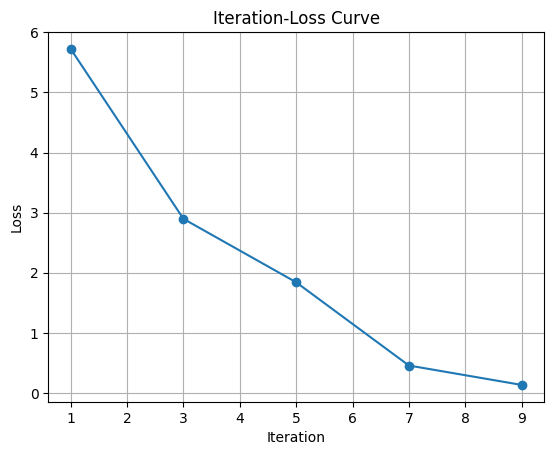

In [ ]:
import matplotlib.pyplot as plt

# Define the iteration and loss values
iterations = [1, 3, 5, 7, 9]
losses = [5.724730014801025, 2.89747953414917, 1.842041015625, 0.45730704069137573, 0.13427282869815826]

# Create the iteration-loss curve
plt.plot(iterations, losses, marker='o', linestyle='-')

# Label the axes
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Title of the plot
plt.title('Iteration-Loss Curve')

# Display the plot
plt.grid(True)
plt.show()


### Step 4: Eval

In [ ]:
human_texts = validate_df['wiki_intro'][:10]
gen_texts = validate_df['generated_intro'][:10]
outputs = []
for x in human_texts:
    inputs = detector_tokenizer(x, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs.append(detector_model(**inputs))


OutOfMemoryError: ignored

In [ ]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.6230, -3.1418]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### Step 5: Validation - not tested

In [ ]:
# Evaluate the detector model on the validation dataset
validation_data = validate_df.to_numpy()
human_texts = validation_data[:, 0]
generated_texts = validation_data[:, 1]

# Calculate the AUROC score
auroc_scores = []
for i in range(len(human_texts)):
    human_score = calculate_reward(human_texts[i], detector_model, detector_tokenizer)
    generated_score = calculate_reward(generated_texts[i], detector_model, detector_tokenizer)
    auroc_scores.append(human_score - generated_score)

# Select the best detector and paraphraser models based on AUROC scores
best_detector_model = detector_model  # Update this based on the best model selection
best_paraphraser_model = paraphraser_model  # Update this based on the best model selection